# Discussion on AUC and Log-Loss

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
plt.style.use('fivethirtyeight') 
from custom_functions import plot_conf_mat, plot_roc_curve, plot_feature_importance, calculateMetricsAndPrint

## 1. AUC Scenarios:

### 1.1. Full Separation:

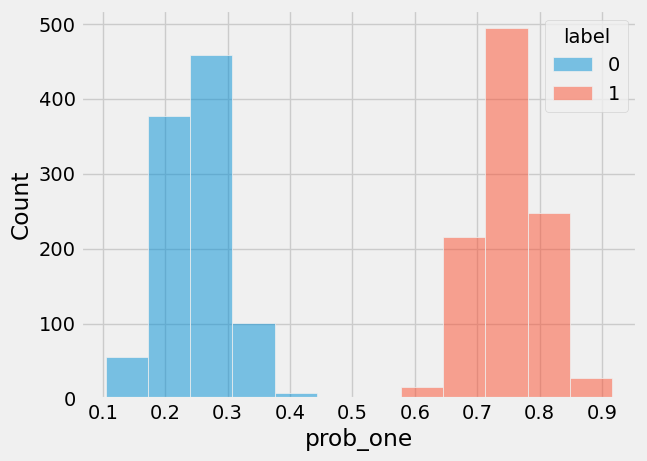

In [2]:
score0 = pd.DataFrame(np.random.normal(.25,.05,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.75,.05,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

AUC Score = 100.000


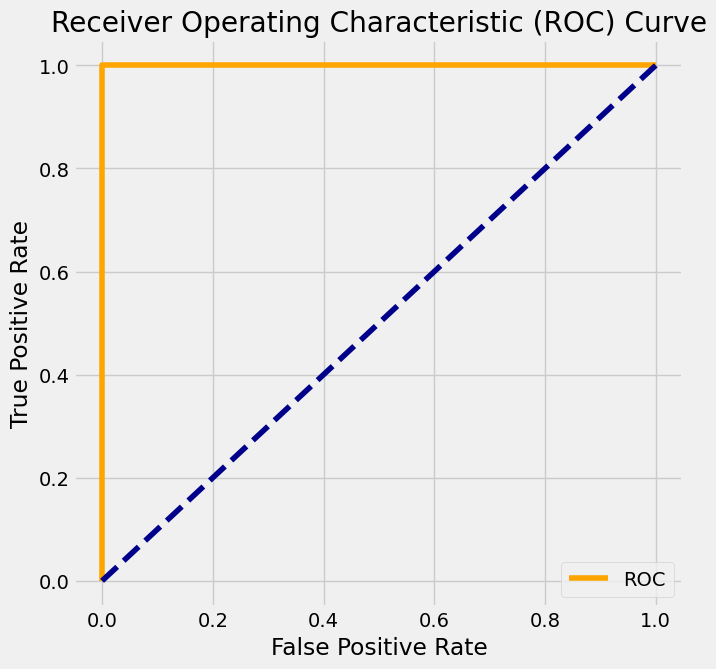

In [3]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

### 1.2. Slight Overlap:

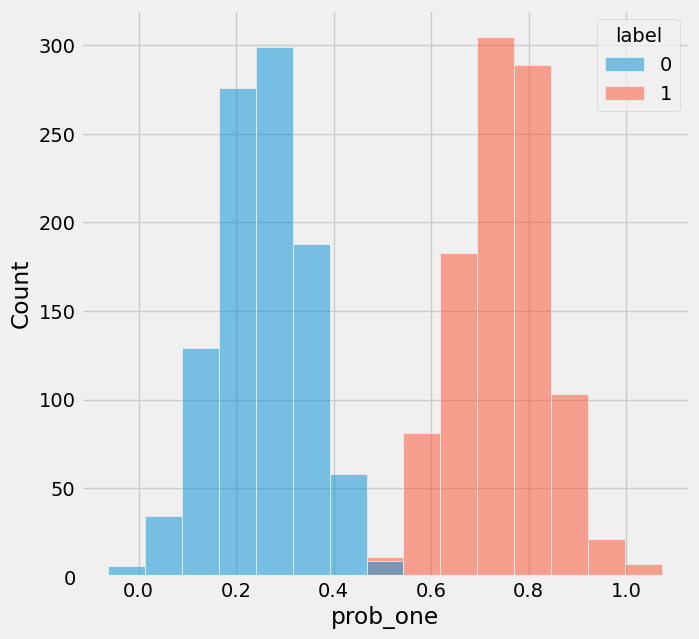

In [4]:
score0 = pd.DataFrame(np.random.normal(.25,.09,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.75,.09,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

AUC Score = 99.996


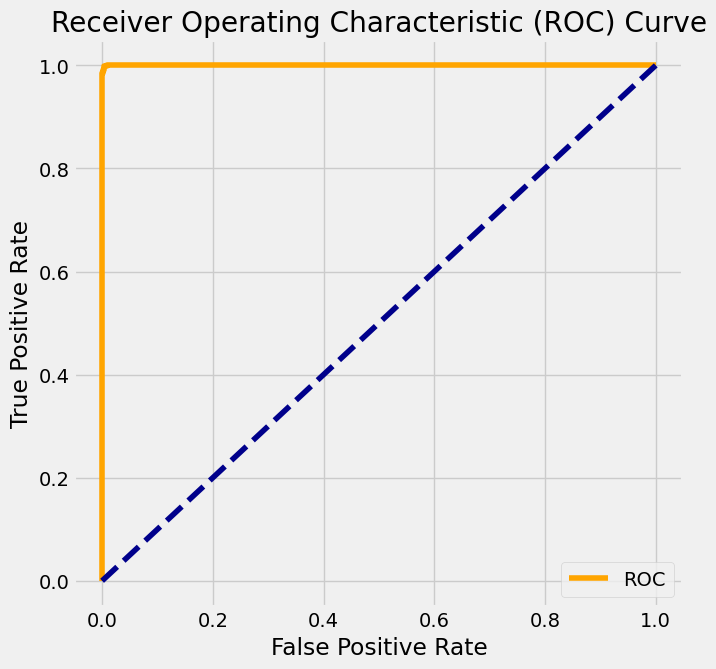

In [5]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

### 1.3. Overlap:

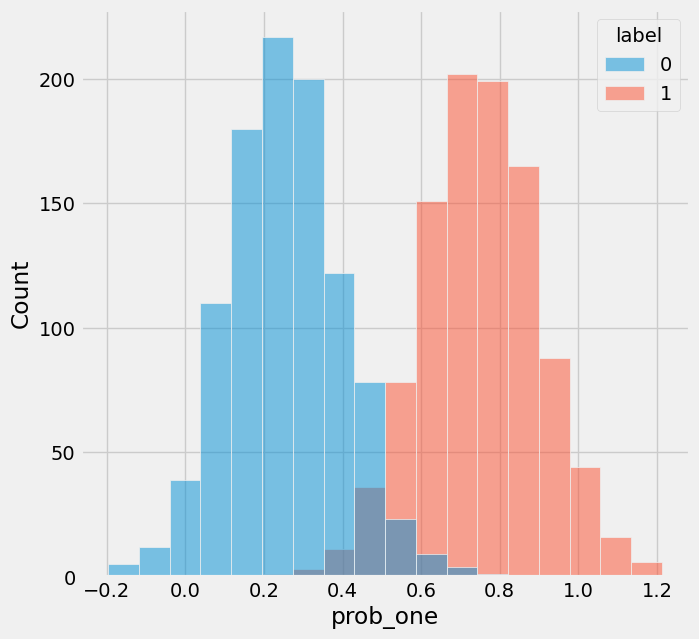

In [6]:
score0 = pd.DataFrame(np.random.normal(.25,.15,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.75,.15,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

AUC Score = 99.105


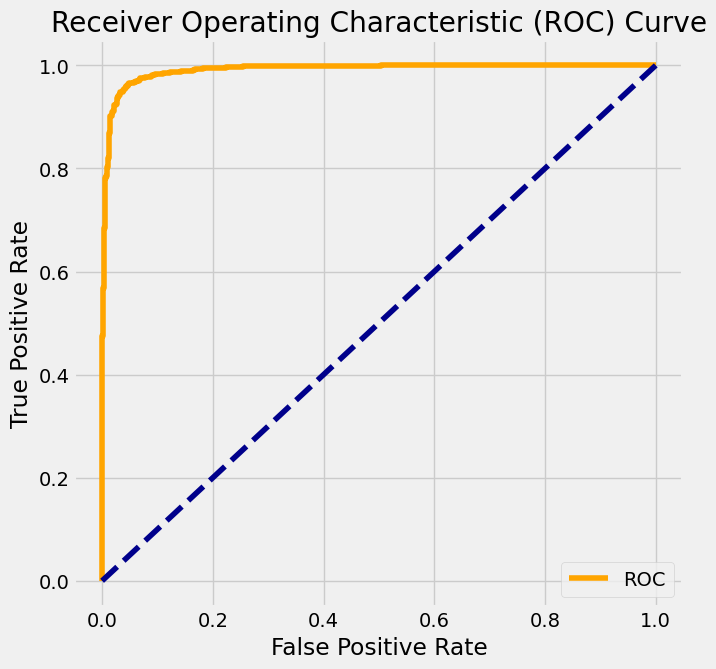

In [7]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

### 1.4. Major Overlap:

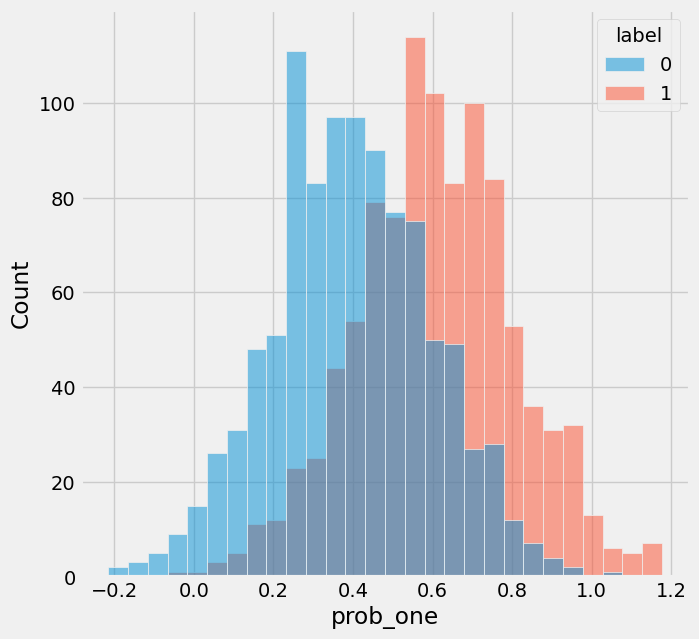

In [8]:
score0 = pd.DataFrame(np.random.normal(.4,.2,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.6,.2,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

AUC Score = 77.530


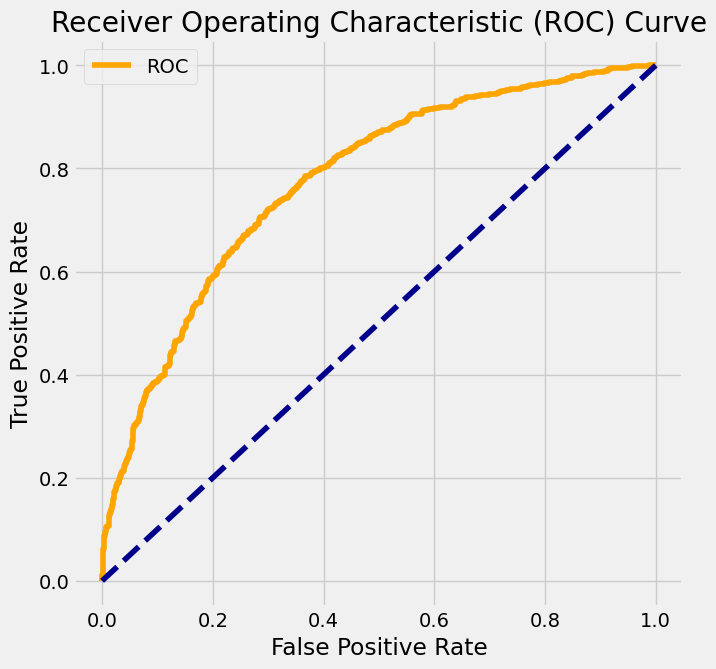

In [9]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

### 1.5. Reverse Separation:

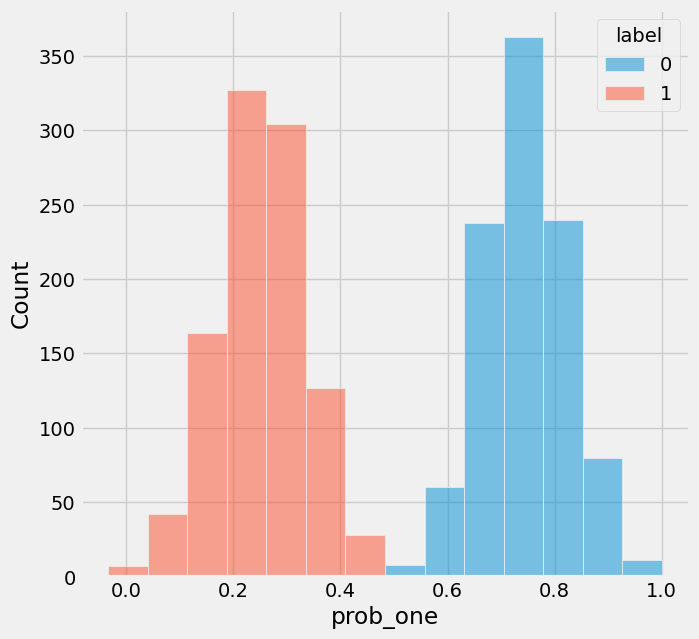

In [10]:
score0 = pd.DataFrame(np.random.normal(.75,.08,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.25,.08,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

AUC Score = 0.000


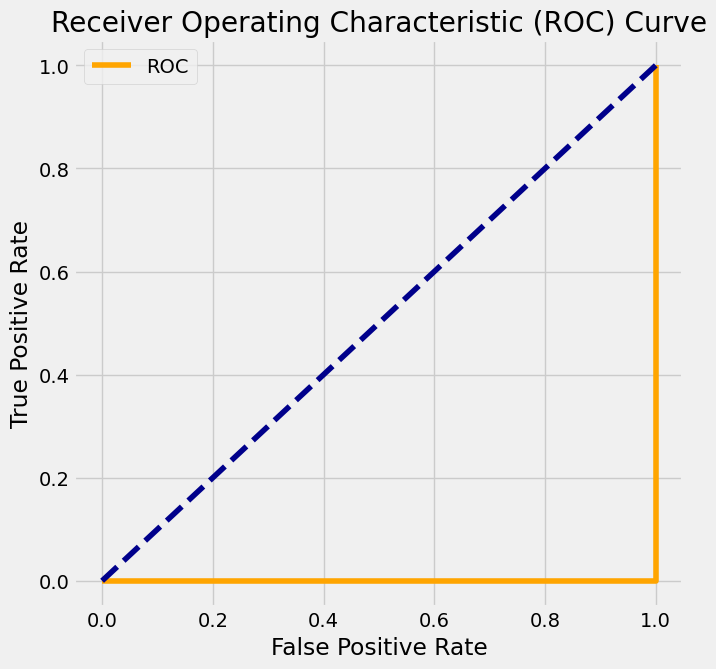

In [11]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

### 1.6. Shifted Separation:

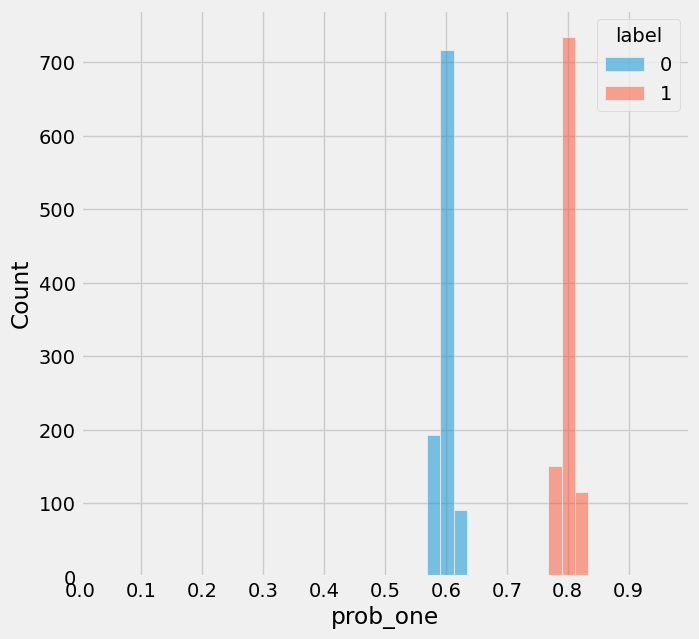

In [12]:
score0 = pd.DataFrame(np.random.normal(.6,.01,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.8,.01,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
p = sns.histplot(data=scores, x="prob_one", hue="label")
p.set_xlim(0,1)
p.set_xticks(np.arange(0,1,.1))
plt.show()

AUC Score = 100.000


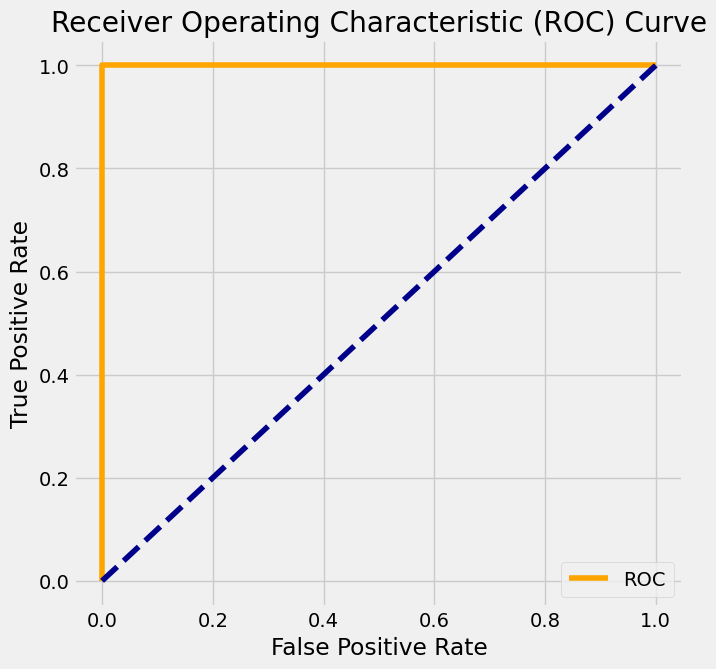

In [13]:
plot_roc_curve(scores.label, # Actual labels
               scores.prob_one, # Prediction scores for the positive class
               pos_label = 1 # Indicate the label that corresponds to the positive class
              )

## 2. Log-Loss

### 2.1. Full Separation (AUC=1) and Log-Loss Near Zero:

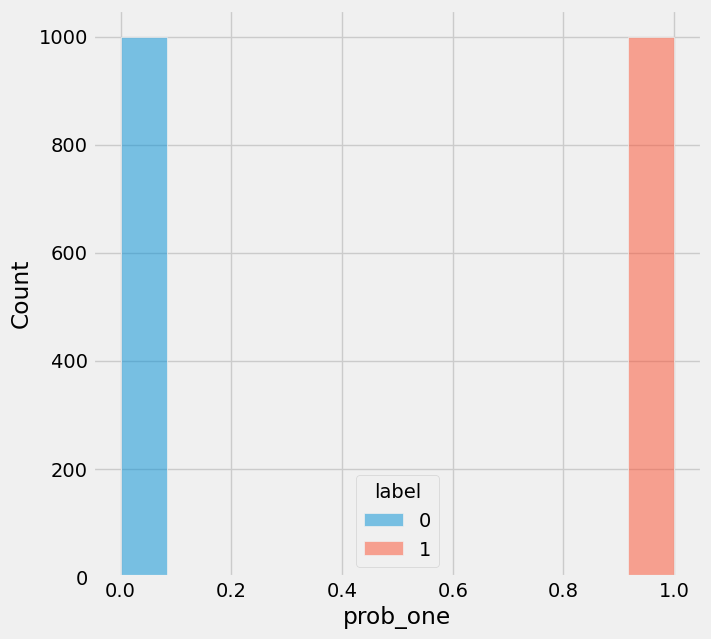

In [14]:
score0 = pd.DataFrame(np.random.normal(0,.00001,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(1,.00001,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

In [15]:
log_loss(scores.label,scores.prob_one)

3.961625471147553e-06

### 2.2. Full Separation (AUC=1) but Log-Loss Not Zero: 

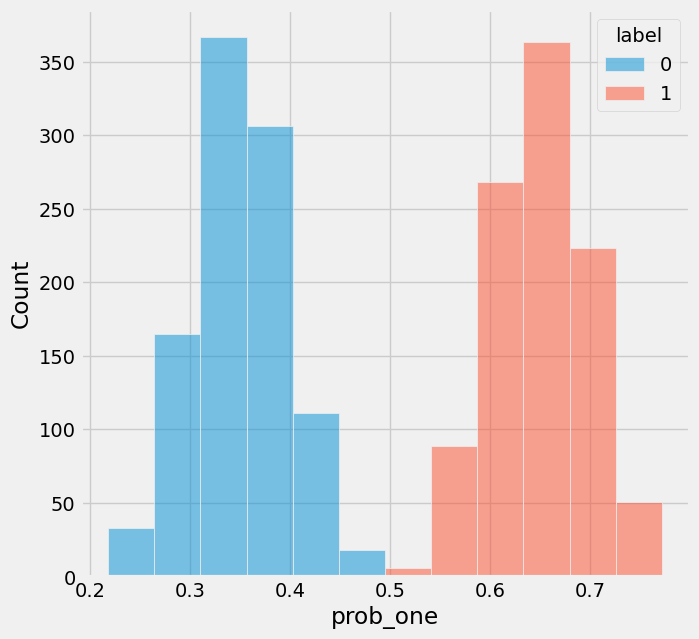

In [22]:
score0 = pd.DataFrame(np.random.normal(.35,.045,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.65,.045,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

In [23]:
log_loss(scores.label,scores.prob_one)

0.4326829309279227

### 2.3. Full Separation (AUC=1) But High Log-Loss:

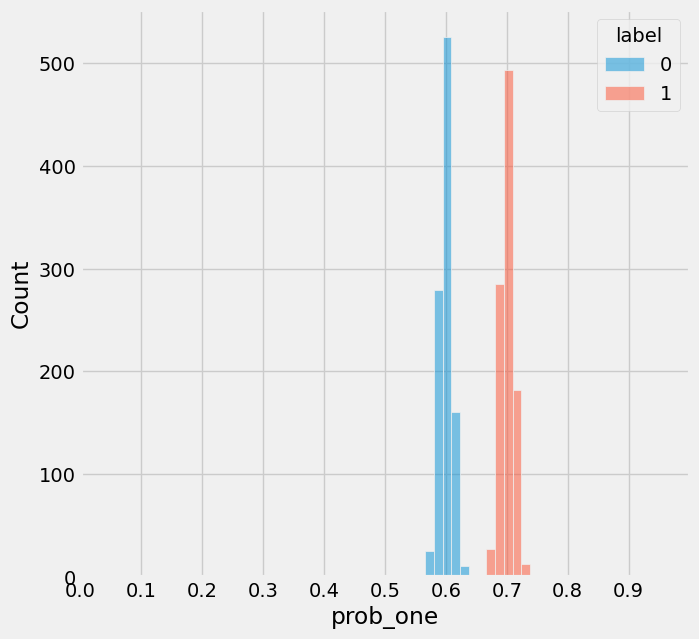

In [18]:
score0 = pd.DataFrame(np.random.normal(.6,.01,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.7,.01,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
p = sns.histplot(data=scores, x="prob_one", hue="label")
p.set_xlim(0,1)
p.set_xticks(np.arange(0,1,.1))
plt.show()

In [19]:
log_loss(scores.label,scores.prob_one)

0.6361341818647199

### 2.4. Major Overlap (AUC<<1) & High Log-Loss: 

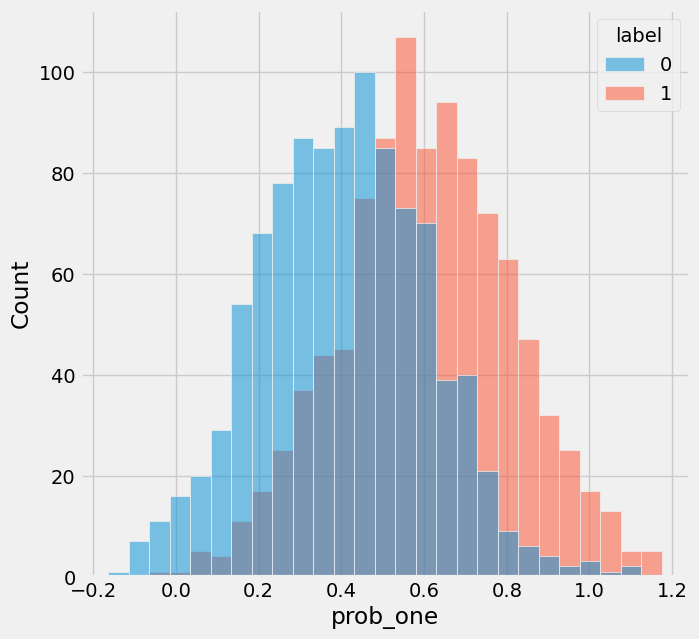

In [20]:
score0 = pd.DataFrame(np.random.normal(.4,.2,1000),columns = ["prob_one"])
score0['label'] = 0
score1 = pd.DataFrame(np.random.normal(.6,.2,1000),columns = ["prob_one"])
score1['label'] = 1
scores = pd.concat([score0,score1])
sns.histplot(data=scores, x="prob_one", hue="label")
plt.show()

In [21]:
log_loss(scores.label,scores.prob_one)

0.664468605430504